In [1]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [2]:
#pip install xgboost

In [3]:
X_train = data_train.loc[ : , data_train.columns != 'y'] 
y_train = data_train["y"]
X_test = data_test.loc[ : , data_test.columns != 'y'] 
y_test = data_test["y"]

In [4]:
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [5]:
xgbc.fit(X_train, y_train).score(X_train, y_train)

1.0

In [6]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.75


In [7]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.73


In [8]:
pred = xgbc.predict(X_test)
prob=xgbc.predict_proba(X_test)[::,1]
cm = confusion_matrix(y_test,pred) 
print(cm)
print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

[[388 103]
 [128 381]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       491
           1       0.79      0.75      0.77       509

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



0.769

Misclassification error=0.231

In [9]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.84%


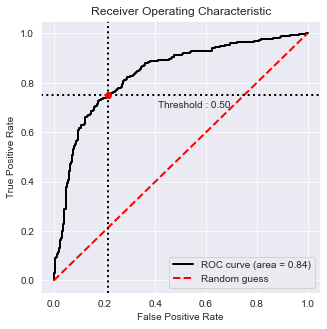

In [10]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [11]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

0.7485265225933202

In [12]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, pred)))

F1 Score: 0.7673716012084592


In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200,300]}

model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose=1)

model.fit(X_train,y_train)
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.775
{'max_depth': 2, 'n_estimators': 200}


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.6s finished


In [14]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True).score(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[0]	validation_0-error:0.27000	validation_0-logloss:0.63498	validation_1-error:0.35900	validation_1-logloss:0.65913
[1]	validation_0-error:0.21500	validation_0-logloss:0.58644	validation_1-error:0.32500	validation_1-logloss:0.62345
[2]	validation_0-error:0.19500	validation_0-logloss:0.54075	validation_1-error:0.31100	validation_1-logloss:0.60334
[3]	validation_0-error:0.16000	validation_0-logloss:0.49809	validation_1-error:0.27200	validation_1-logloss:0.57600
[4]	validation_0-error:0.13000	validation_0-logloss:0.46604	validation_1-error:0.25400	validation_1-logloss:0.55885
[5]	validation_0-error:0.13000	validation_0-logloss:0.44581	validation_1-error:0.25500	validation_1-logloss:0.54957
[6]	validation_0-error:0.11500	validation_0-logloss:0.42684	validation_1-error:0.24400	validation_1-logloss:0.54180
[7]	validation_0-error:0.12000	validation_0-logloss:0.40902	validation_1-error:0.25500	validation_1-logloss:0.53931
[8]	validat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0]	validation_0-error:0.29000	validation_0-logloss:0.64401	validation_1-error:0.38300	validation_1-logloss:0.67022
[1]	validation_0-error:0.21000	validation_0-logloss:0.59148	validation_1-error:0.31500	validation_1-logloss:0.63885
[2]	validation_0-error:0.17000	validation_0-logloss:0.55402	validation_1-error:0.31500	validation_1-logloss:0.61590
[3]	validation_0-error:0.16000	validation_0-logloss:0.52258	validation_1-error:0.30400	validation_1-logloss:0.60645
[4]	validation_0-error:0.13500	validation_0-logloss:0.49861	validation_1-error:0.29300	validation_1-logloss:0.58837
[5]	validation_0-error:0.16000	validation_0-logloss:0.47840	validation_1-error:0.28100	validation_1-logloss:0.58177
[6]	validation_0-error:0.12500	validation_0-logloss:0.44816	validation_1-error:0.27200	validation_1-logloss:0.56658
[7]	validation_0-error:0.13500	validation_0-logloss:0.42828	validation_1-error:0.25900	validation_1-logloss:0.55900
[8]	validation_0-error:0.10000	validation_0-logloss:0.40682	validation_1

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   16.8s finished


[104]	validation_0-error:0.00000	validation_0-logloss:0.03661	validation_1-error:0.22300	validation_1-logloss:0.64211
[105]	validation_0-error:0.00000	validation_0-logloss:0.03619	validation_1-error:0.22300	validation_1-logloss:0.64203
[106]	validation_0-error:0.00000	validation_0-logloss:0.03584	validation_1-error:0.22500	validation_1-logloss:0.64576
[107]	validation_0-error:0.00000	validation_0-logloss:0.03531	validation_1-error:0.22400	validation_1-logloss:0.64801
[108]	validation_0-error:0.00000	validation_0-logloss:0.03493	validation_1-error:0.22300	validation_1-logloss:0.64892
[109]	validation_0-error:0.00000	validation_0-logloss:0.03456	validation_1-error:0.22500	validation_1-logloss:0.64852
[110]	validation_0-error:0.00000	validation_0-logloss:0.03397	validation_1-error:0.22300	validation_1-logloss:0.65155
[111]	validation_0-error:0.00000	validation_0-logloss:0.03368	validation_1-error:0.22700	validation_1-logloss:0.65481
[112]	validation_0-error:0.00000	validation_0-logloss:0.

1.0

In [15]:
results = model.best_estimator_.evals_result()
print(results)

{'validation_0': {'error': [0.29, 0.205, 0.175, 0.115, 0.095, 0.095, 0.08, 0.095, 0.095, 0.075, 0.07, 0.065, 0.055, 0.05, 0.045, 0.045, 0.04, 0.045, 0.04, 0.035, 0.04, 0.03, 0.03, 0.03, 0.025, 0.025, 0.025, 0.025, 0.02, 0.015, 0.02, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.005, 0.005, 0.005, 0.015, 0.01, 0.005, 0.005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [16]:
results['validation_0']['error']

[0.29,
 0.205,
 0.175,
 0.115,
 0.095,
 0.095,
 0.08,
 0.095,
 0.095,
 0.075,
 0.07,
 0.065,
 0.055,
 0.05,
 0.045,
 0.045,
 0.04,
 0.045,
 0.04,
 0.035,
 0.04,
 0.03,
 0.03,
 0.03,
 0.025,
 0.025,
 0.025,
 0.025,
 0.02,
 0.015,
 0.02,
 0.015,
 0.015,
 0.015,
 0.015,
 0.015,
 0.015,
 0.015,
 0.015,
 0.005,
 0.005,
 0.005,
 0.015,
 0.01,
 0.005,
 0.005,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

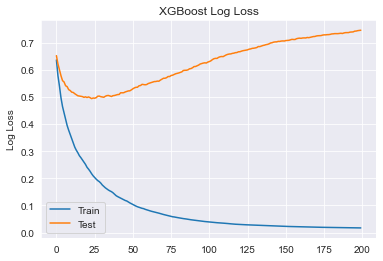

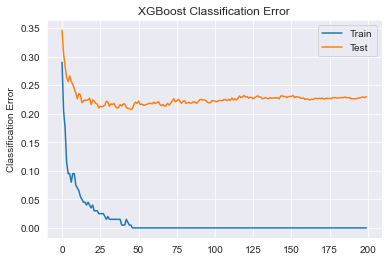

In [17]:
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [18]:
#Early Stopping
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=25, eval_metric="logloss", eval_set=eval_set, verbose=True).score(X_train, y_train)
#model.fit(X_train, y_train).score(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[0]	validation_0-logloss:0.65913
Will train until validation_0-logloss hasn't improved in 25 rounds.
[1]	validation_0-logloss:0.62345
[2]	validation_0-logloss:0.60334
[3]	validation_0-logloss:0.57600
[4]	validation_0-logloss:0.55885
[5]	validation_0-logloss:0.54957
[6]	validation_0-logloss:0.54180
[7]	validation_0-logloss:0.53931
[8]	validation_0-logloss:0.53478
[9]	validation_0-logloss:0.52709
[10]	validation_0-logloss:0.52841
[11]	validation_0-logloss:0.52581
[12]	validation_0-logloss:0.52076
[13]	validation_0-logloss:0.51439
[14]	validation_0-logloss:0.51301
[15]	validation_0-logloss:0.50820
[16]	validation_0-logloss:0.50989
[17]	validation_0-logloss:0.50866
[18]	validation_0-logloss:0.51164
[19]	validation_0-logloss:0.51164
[20]	validation_0-logloss:0.51054
[21]	validation_0-logloss:0.50823
[22]	validation_0-logloss:0.50613
[23]	validation_0-logloss:0.50468
[24]	validation_0-logloss:0.50874
[25]	validation_0-logloss:0.510

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[44]	validation_0-logloss:0.54607
[45]	validation_0-logloss:0.55021
[46]	validation_0-logloss:0.55145
[47]	validation_0-logloss:0.55286
[48]	validation_0-logloss:0.55420
[49]	validation_0-logloss:0.55360
[0]	validation_0-logloss:0.66687
Will train until validation_0-logloss hasn't improved in 25 rounds.
[1]	validation_0-logloss:0.63513
[2]	validation_0-logloss:0.61531
[3]	validation_0-logloss:0.59202
[4]	validation_0-logloss:0.57874
[5]	validation_0-logloss:0.56705
[6]	validation_0-logloss:0.55317
[7]	validation_0-logloss:0.55302
[8]	validation_0-logloss:0.54278
[9]	validation_0-logloss:0.54260
[10]	validation_0-logloss:0.54134
[11]	validation_0-logloss:0.53569
[12]	validation_0-logloss:0.52813
[13]	validation_0-logloss:0.53168
[14]	validation_0-logloss:0.52878
[15]	validation_0-logloss:0.53597
[16]	validation_0-logloss:0.53299
[17]	validation_0-logloss:0.53175
[18]	validation_0-logloss:0.53336
[19]	validation_0-logloss:0.53690
[20]	validation_0-logloss:0.53936
[21]	validation_0-loglos

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.6s finished


0.97

Training error=0.03

In [19]:
y_pred = model.predict(X_test)
prob=model.predict_proba(X_test)[::,1]
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
accuracy

0.783

Misclassification error=0.217

In [20]:
cm = confusion_matrix(y_test,predictions) 
print(cm)
print(classification_report(y_test, predictions))

[[396  95]
 [122 387]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       491
           1       0.80      0.76      0.78       509

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



In [21]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.85%


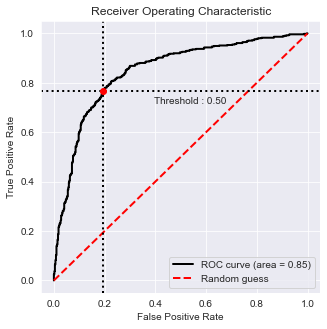

In [22]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions)

0.7603143418467584

In [24]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, predictions)))

F1 Score: 0.7810292633703331
